In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Carga de datos
df = pd.read_csv("ultimate.csv")

# 2. Definir X (features) e y (target)
#    - Eliminamos las columnas 'Hz', 'medida', y 'Tipo' de X
#    - 'Tipo' será nuestro objetivo (y)
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# 3. División en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,      # 20% para test
    random_state=42,    # Semilla para reproducibilidad
    shuffle=True
)

# 4. Creación y entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predicción en el conjunto de test
y_pred = model.predict(X_test)

# 6. Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)



Accuracy: 0.99
Matriz de Confusión:
[[1514    0    8    3    3   49]
 [   4 2754    0    2    0    5]
 [   5    0  379    1    0    0]
 [   3    2    0 4825    3    1]
 [  11    1    1    3 4810    4]
 [   7    3    2    1   10 2386]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.96      0.97      1577
              imbalance       1.00      1.00      1.00      2765
                 normal       0.97      0.98      0.98       385
               overhang       1.00      1.00      1.00      4834
              underhang       1.00      1.00      1.00      4830
  vertical-misalignment       0.98      0.99      0.98      2409

               accuracy                           0.99     16800
              macro avg       0.99      0.99      0.99     16800
           weighted avg       0.99      0.99      0.99     16800



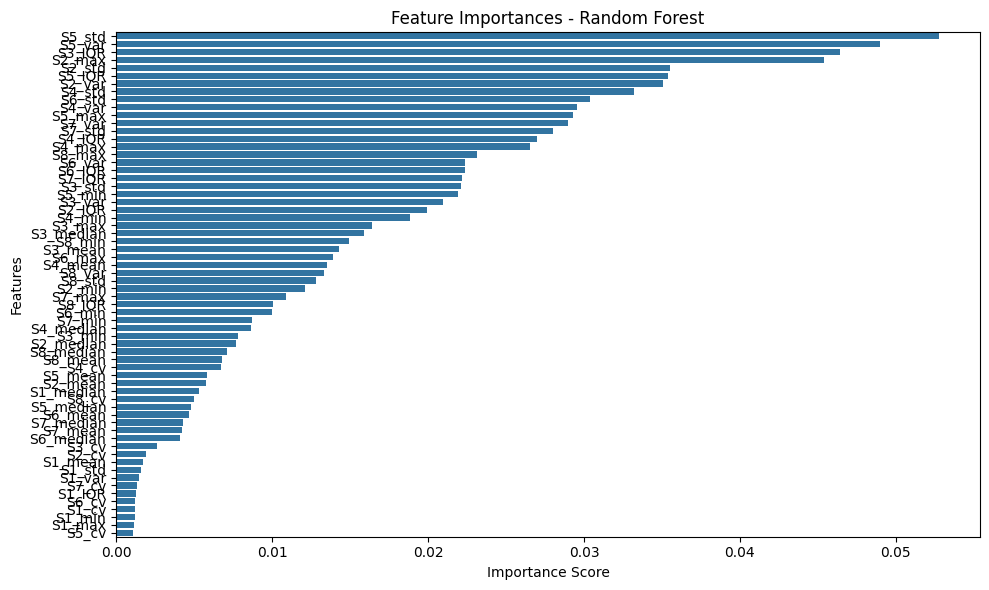

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asumiendo que ya entrenaste tu modelo y tienes:
# model = RandomForestClassifier(...)
# model.fit(X_train, y_train)

# 1. Extraer importancias de las características
importances = model.feature_importances_

# 2. Crear un Series de pandas que asocie cada importancia con el nombre de la columna
feature_importance_series = pd.Series(importances, index=X_train.columns)

# 3. Ordenar de mayor a menor
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# 4. Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# PRUEBA PARA EVITAR OVERFITTING
prueba1

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Carga de datos
df = pd.read_csv("dultimate.csv")

# 2. Dividir el DataFrame en train y test de acuerdo a la columna 'medida'
df_train = df[df["medida"] != "6g"]  # Para entrenar
df_test  = df[df["medida"] == "6g"]  # Para probar

# 3. Definir X (features) e y (target) para TRAIN
#    Quitamos las columnas 'Hz', 'medida' y 'Tipo'
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

# 4. Definir X (features) e y (target) para TEST
X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# 5. Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predicción en el conjunto de test (solo "medida" = "6g")
y_pred = model.predict(X_test)

# 7. Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)


Accuracy (test con 'medida' = 6g): 0.96
Matriz de Confusión:
[[   0    0    0    0    0    0]
 [   2 1942   36    0    0   20]
 [   0    0    0    0    0    0]
 [  38   90   64 5717   58   33]
 [  12    0    7  141 5812   28]
 [   0    0    0    0    0    0]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.00      0.00      0.00         0
              imbalance       0.96      0.97      0.96      2000
                 normal       0.00      0.00      0.00         0
               overhang       0.98      0.95      0.96      6000
              underhang       0.99      0.97      0.98      6000
  vertical-misalignment       0.00      0.00      0.00         0

               accuracy                           0.96     14000
              macro avg       0.49      0.48      0.48     14000
           weighted avg       0.98      0.96      0.97     14000



c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


prueba 2

Accuracy (test con 'medida' = 6g, '1.5mm', '1.40mm'): 0.98
Matriz de Confusión:
[[ 7200     2   342   185   158   113]
 [    0 13958    33     0     0     9]
 [    0     0  2000     0     0     0]
 [   32    66   115 23680    75    32]
 [    5     0     8   172 23772    43]
 [    6     1     0     4     0 11989]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.99      0.90      0.94      8000
              imbalance       1.00      1.00      1.00     14000
                 normal       0.80      1.00      0.89      2000
               overhang       0.98      0.99      0.99     24000
              underhang       0.99      0.99      0.99     24000
  vertical-misalignment       0.98      1.00      0.99     12000

               accuracy                           0.98     84000
              macro avg       0.96      0.98      0.97     84000
           weighted avg       0.98      0.98      0.98     84000



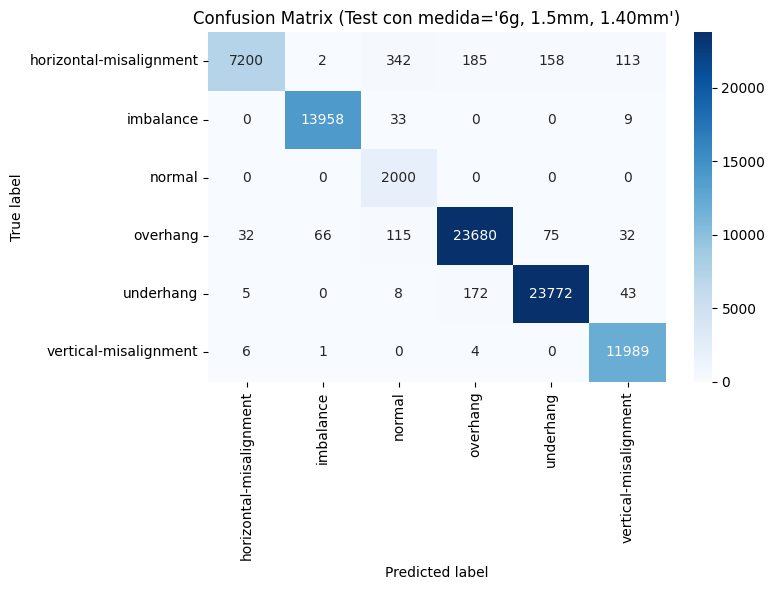

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g") & (df["medida"] != "1.5mm") & (df["medida"] != "1.40mm") & (df["medida"] != 0)]  # Para entrenar
df_test  = df[(df["medida"] == "6g") | (df["medida"] == "1.5mm") | (df["medida"] == "1.40mm") | (df["medida"] != 0)]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g, '1.5mm', '1.40mm'): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g, 1.5mm, 1.40mm')")
plt.tight_layout()
plt.show()
